# AllLife Bank Customer Segmentation

## Description

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

Sl_No: Primary key of the records

Customer Key: Customer identification number

Average Credit Limit: Average credit limit of each customer for all credit cards

Total credit cards: Total number of credit cards possessed by the customer

Total visits bank: Total number of visits that customer made (yearly) personally to the bank

Total visits online: Total number of visits or online logins made by the customer (yearly)

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)



 ## Importing all the libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# For Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# Pairwise distribution between data points
from scipy.spatial.distance import pdist

<IPython.core.display.Javascript object>

In [2]:
# Loading the dataset
df = pd.read_excel("Credit+Card+Customer+Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
df.shape

(660, 7)

<IPython.core.display.Javascript object>

## Data Overview

In [4]:
data = df.copy()

<IPython.core.display.Javascript object>

In [5]:
# First 5 rows
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [6]:
# Viewing last 5 rows of the dataset
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [7]:
# Checking data type of the columns of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

### Observation

1. All columns have integer data type

2. There are no null values


### Checking for duplicates

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Observations

There are no null values

In [9]:
data["Customer Key"].duplicated().sum()

5

<IPython.core.display.Javascript object>

In [10]:
data["Customer Key"].value_counts()

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
data[data["Customer Key"] == 50706]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


<IPython.core.display.Javascript object>

In [12]:
data[data["Customer Key"] == 37252]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


<IPython.core.display.Javascript object>

In [13]:
data[data["Customer Key"] == 97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

In [14]:
data[data["Customer Key"] == 96929]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


<IPython.core.display.Javascript object>

In [15]:
data[data["Customer Key"] == 47437]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


<IPython.core.display.Javascript object>

### Observations

5 customer IDs 50706, 37252, 97935, 96929 and 47437 have duplicate value. But the rest of the attributes for same ID are very different. Duplicate IDs are possible when customer changed profile. We don't need to remove these rows.


### Checking for the null value in the dataset


In [16]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

### Observations

None of the attributes have null values

In [17]:
# Viewing the statistical summary of the numerical columns in the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

### Observation

1. Avg_Credit_Limit looks like highly right skewed data with many outliers. The minimum is 3000 and max is 200000 and mean is 34574. This means the values are spread over a huge range. Mean and median are also not close.

2. Total number of credit cards ranges from 1 to maximum 10 for some customers. 75% of customers have 4 credit cards.

3. Total visits to bank ranges from 0 to 5. Some clients have not visited the bank even once.

4. Total online visit are much more compared to visits to bank. Maximum number of online visits are 15 while minimum is 0 and mean is around 2.

5. Total calls made is also right skewed. Max number of calls are 10 while 75% of number of calls are 5. While some customers have not even made a single call.

### Eliminating Sl_No and Customer Key as these are not needed for clustering

In [18]:
data.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [19]:
data.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

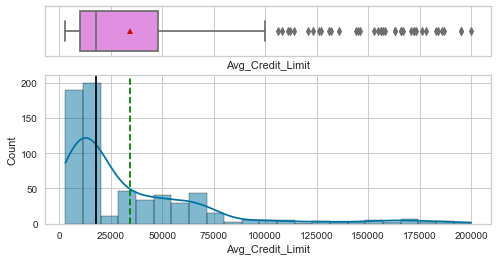

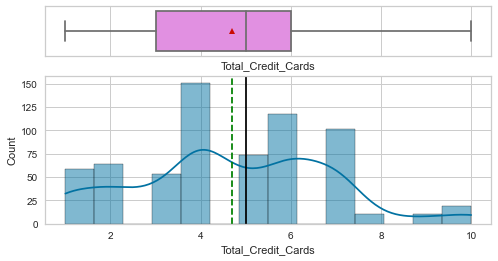

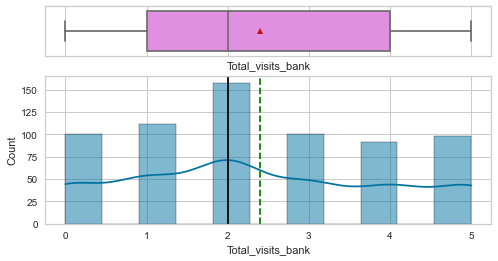

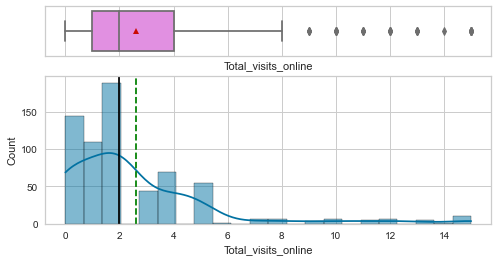

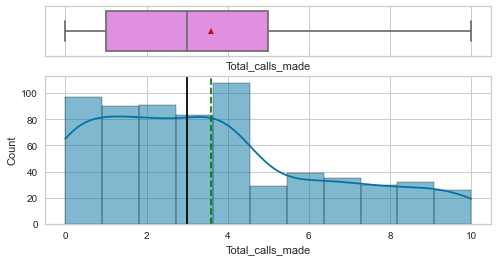

<IPython.core.display.Javascript object>

In [22]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

### Observation

1. The Avg_Credit_Limit is highly right skewed with a number of outliers

2. Few clusters can be seen in the Total_Credit_Cards attribute. Maximum number of people have take 4 credit cards.

3. Total_visits_bank is well distributed with maximum number of people visiting the bank twice.

4. Total_visits_online is also highly right skewed and maximum number of online visits between 0 to 2

5. Total_calls_made is also right skewed with mean and median around 3 and 3.5 .

### CDF Plot

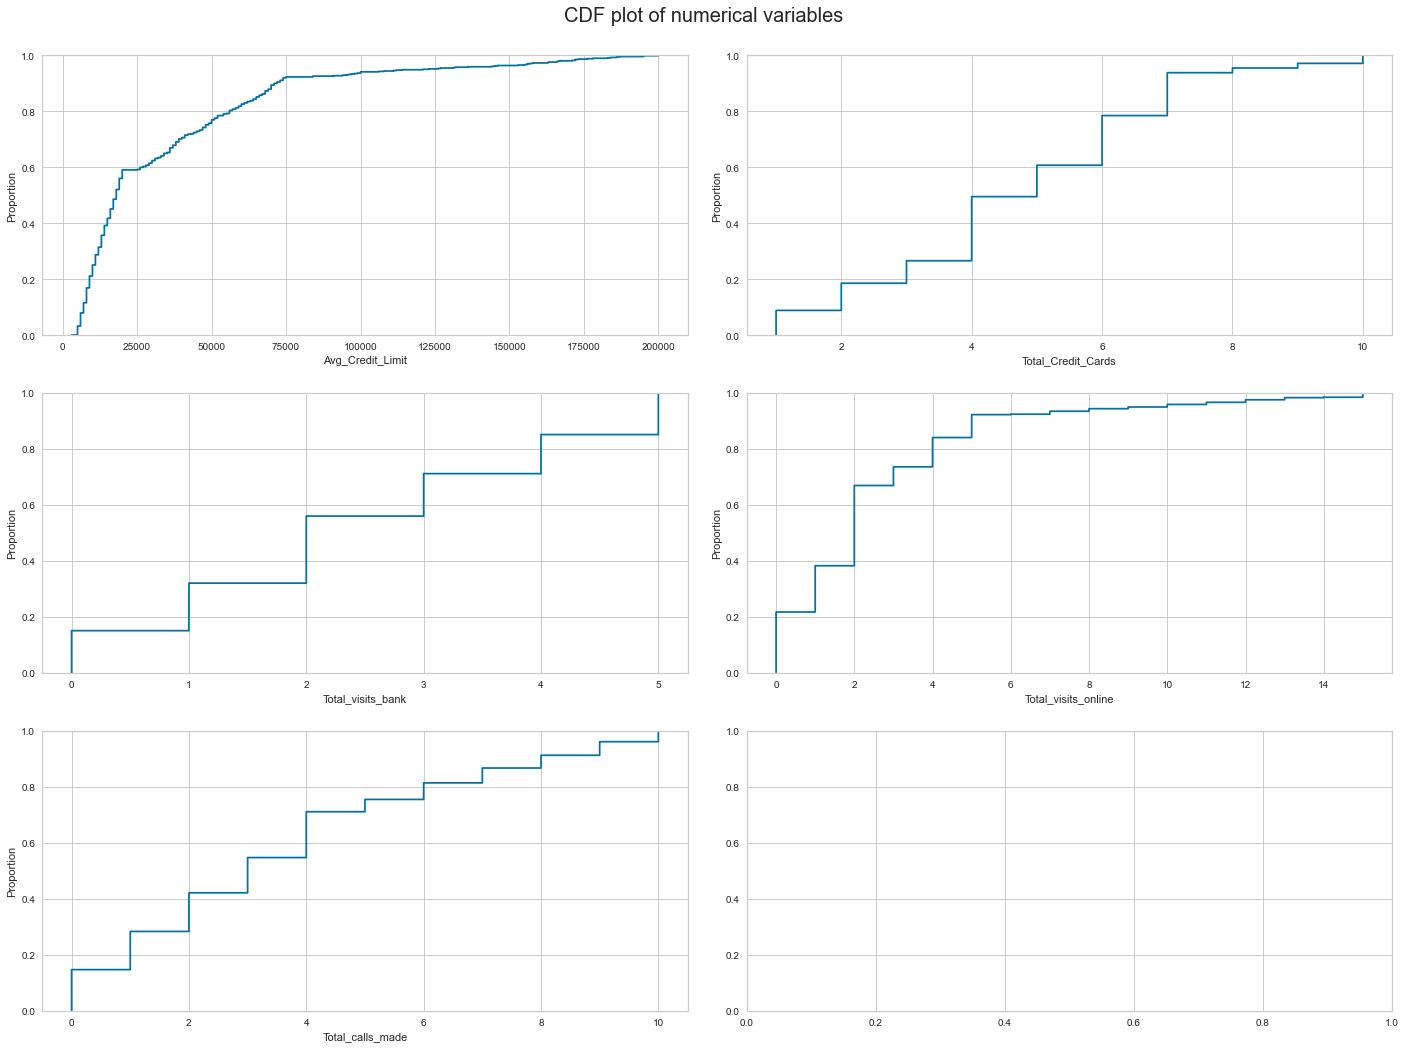

<IPython.core.display.Javascript object>

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Observation

1. Almost 90% customers have less than 75000 credit limit.
2. Only approximately 10% customers have more than 5  to 14 online visits a year
3. 80 % of customers hold under 6 credit cards
4. Total visits made by the customers to the bank is between 0 to 5
5. Nearly 70% of customers have made less than 4 to 5 calls a year.

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

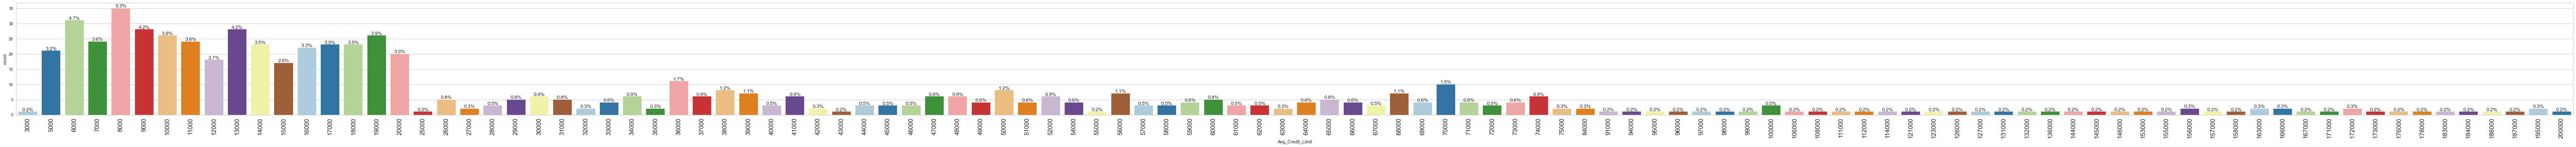

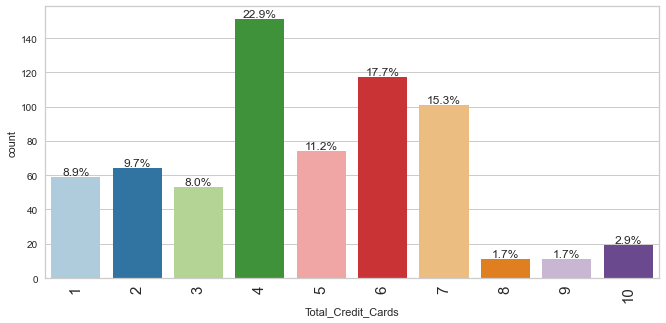

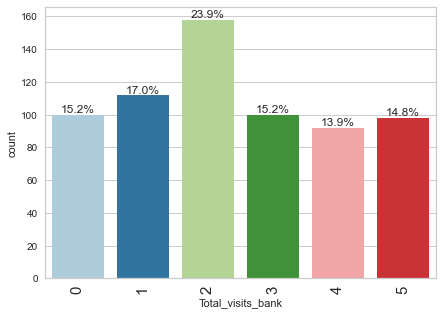

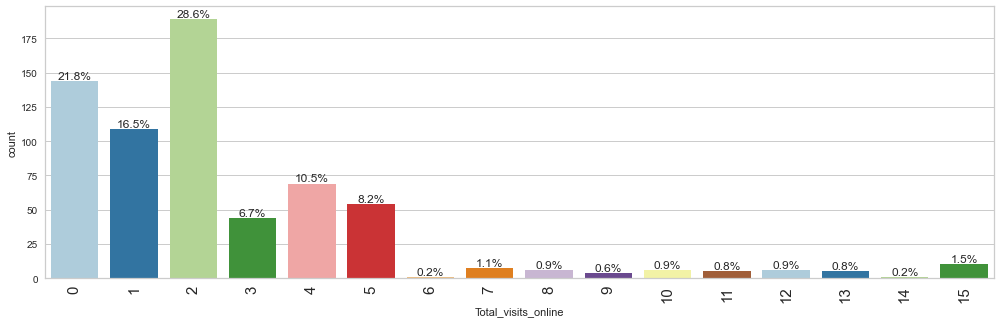

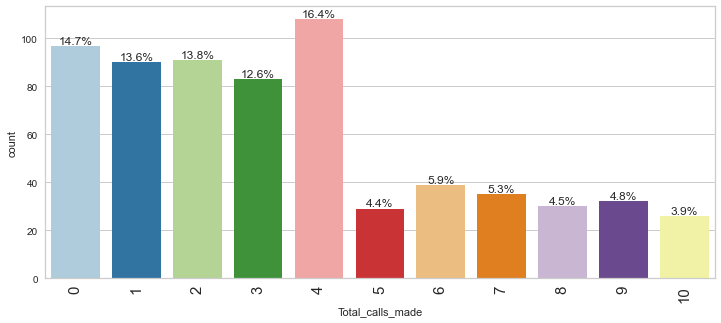

<IPython.core.display.Javascript object>

In [25]:
for item in num_col:
    labeled_barplot(data, item, perc=True)

### Observation

1. 50% of people have credit limit less than 18000

2. More than 65% of clients have 4 to 7 credit cards

3. 24% of clients visit the bank twice. 15% of people have never visited the bank itself.

4. Almost 22% of people have not made an on;ine visit even. Only 8% to 10% have made more than 5 online bank visits

5. Almost 15% of clients have not made any calls to bank. 70% of clients have made 4 or less calls



## Bivariate Analysis

### Checking correlation among variables

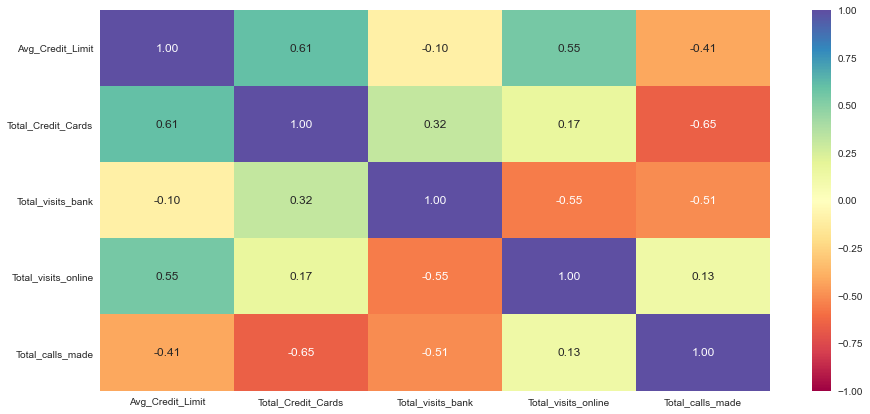

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation

1. Avg_Credit_Limit is positively correlated to Total_Credit_Cards and Total_visits_online. With more number of cards the credit limit is also more and hence more visits by client online

2. At the same time Avg_Credit_Limit is negatively correlated to Total_calls_made. Since the Total_visits_online is more the Total_visit_bank and Total_calls_made is lower.

3. Total_Credit_Cards is also negatively correlated to Total_calls_made. With more credit cards the total number of calls made has dereased.

4. Total_visits_bank is negatively correlated to Total_calls_made and Total_visits_online.

### Pairplot

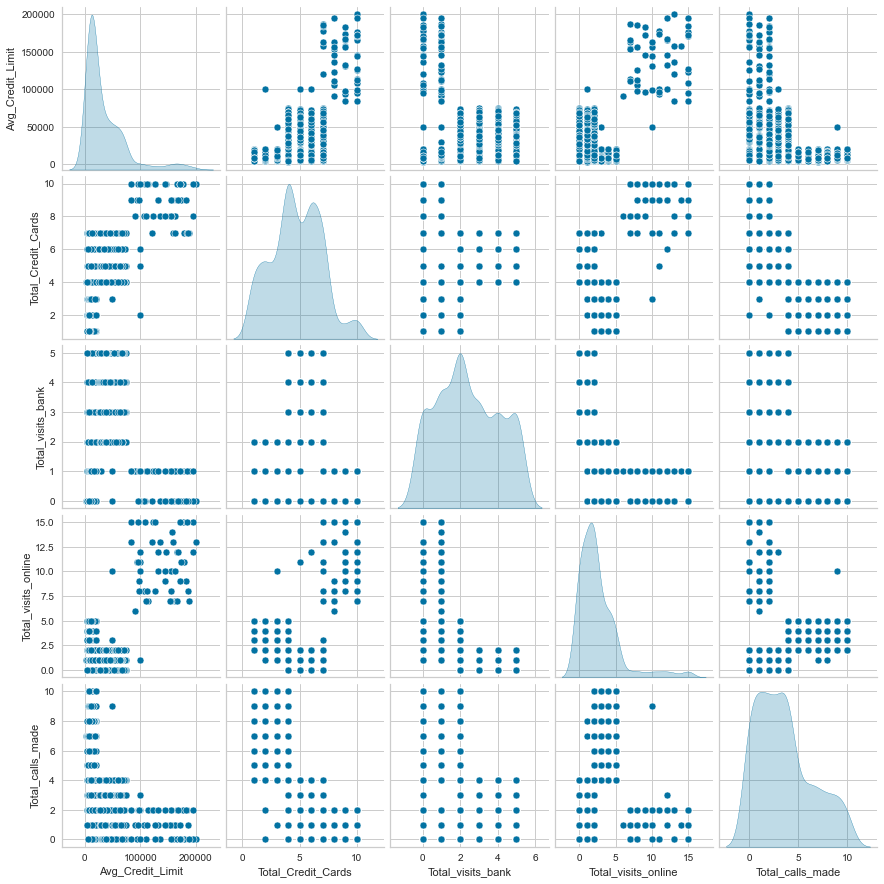

<IPython.core.display.Javascript object>

In [27]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

### Observation

1. Distribution of Total_Credit_Cards and Total_visits_bank indicate more than 4 clusters (observing the rifts and valleys)

2. With more number of credit cards the visits online and average credit limit is also more

3. Avg_Credit_Limit and Total_visits_online is right skewed which shows a number of outliers

### Checking the outliers

In [28]:
data[data["Avg_Credit_Limit"] > 75000].count()

Avg_Credit_Limit       51
Total_Credit_Cards     51
Total_visits_bank      51
Total_visits_online    51
Total_calls_made       51
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
data[data["Avg_Credit_Limit"] > 75000].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,51.0,140235.294118,34592.246666,84000.0,107000.0,145000.0,169000.0,200000.0
Total_Credit_Cards,51.0,8.607843,1.575797,2.0,8.0,9.0,10.0,10.0
Total_visits_bank,51.0,0.607843,0.493089,0.0,0.0,1.0,1.0,1.0
Total_visits_online,51.0,10.705882,3.170452,1.0,8.0,11.0,13.0,15.0
Total_calls_made,51.0,1.058824,0.881176,0.0,0.0,1.0,2.0,3.0


<IPython.core.display.Javascript object>

### Observations

1. 51 observations are extreme outliers for Avg_Credit_Limit. These customers have more than 100000 credit limit

2. These customers have used the online services much more than customers who have lower Avg_Credit_Limit. 

3. These customers have made bare minimum number of calls to the bank or have visited the bank least number of times.

4. These customers hold the maximum number of credit cards. 75% of these customers have 10 credit cards


We will not remove these fields or treat these outliers as these customers have similar features and they can form a seperate cluster which can be very useful for bank to study the behaviour of higher credit limit clients.


### Scaling of data to make the distribution normal (Feature Engineering)

In [30]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [31]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

### Plotting elbow curve and comparing Average distortion for 8 clusters

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9102878066455965
Number of Clusters: 8 	Average Distortion: 0.8890290094805368


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

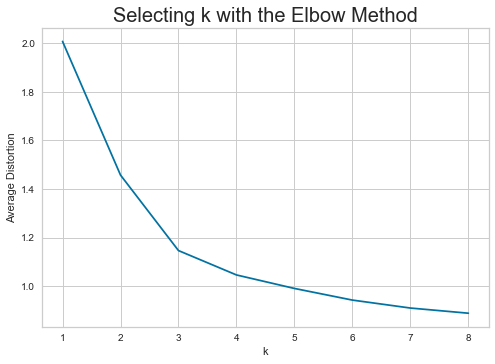

<IPython.core.display.Javascript object>

In [32]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.41842496663230405
For n_clusters = 3, silhouette score is 0.5157182558882754
For n_clusters = 4, silhouette score is 0.35566706193773706
For n_clusters = 5, silhouette score is 0.2717470361094591
For n_clusters = 6, silhouette score is 0.2573329937171245
For n_clusters = 7, silhouette score is 0.24818052759029105
For n_clusters = 8, silhouette score is 0.22563294551301838
For n_clusters = 9, silhouette score is 0.21415935410591844


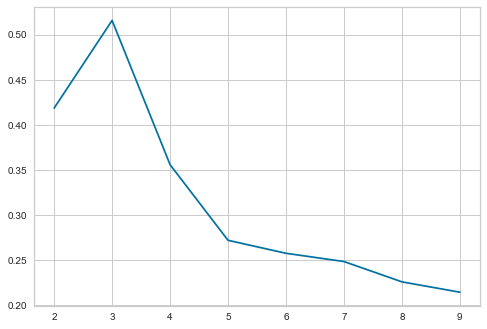

<IPython.core.display.Javascript object>

In [33]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

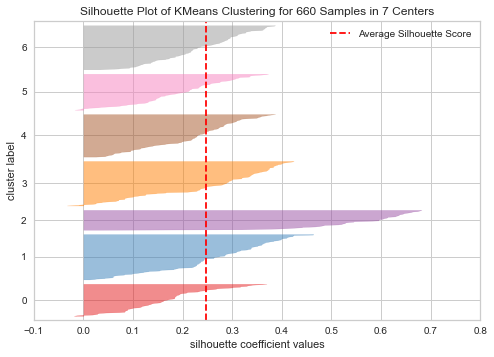

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

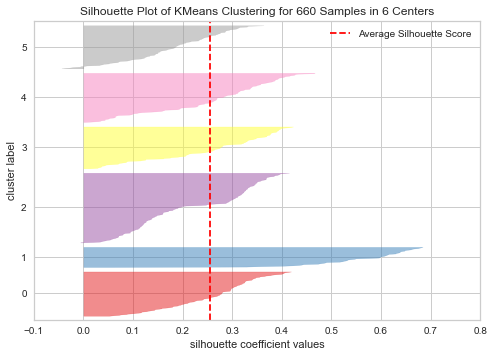

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

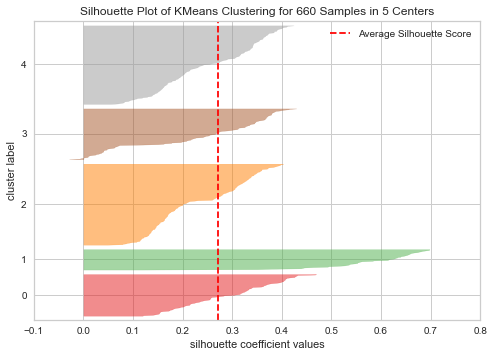

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

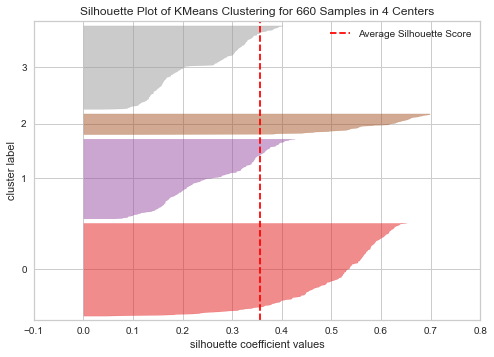

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

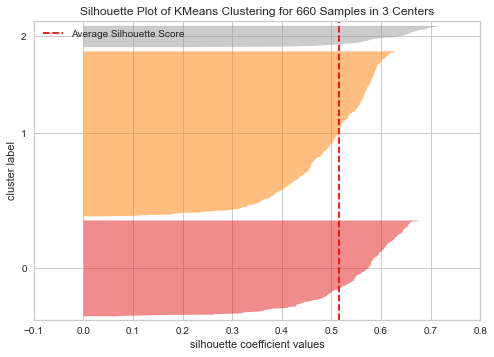

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [40]:
# adding kmeans cluster labels to the original dataframe
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [41]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [42]:
label = kmeans.fit_predict(subset_scaled_df)
print(label)

[4 2 4 4 3 2 3 1 1 2 1 2 2 1 1 2 1 1 2 2 1 2 1 1 2 2 2 2 1 2 1 1 2 1 2 1 2
 1 2 2 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 1 2 2 2 2 1 1
 2 1 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 1 2 2 2 2 2 1 1 1 2 1
 2 2 1 1 2 2 2 1 2 1 2 1 2 2 1 2 2 1 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2 1
 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 1 1 2 2 2 1
 1 1 2 1 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 1 1 2 2 2 1
 2 2 2 1 2 2 4 4 0 4 0 4 0 0 0 0 4 4 4 0 4 0 4 4 0 4 0 0 4 4 0 4 4 0 4 0 4
 0 0 4 0 4 0 0 0 0 0 0 0 4 4 0 0 4 0 0 0 0 0 4 4 4 4 0 0 4 4 0 4 4 4 4 0 0
 0 0 0 0 0 0 4 0 0 0 4 4 0 0 0 4 4 1 4 4 0 0 0 4 0 0 4 4 0 0 0 0 0 0 4 0 4
 0 0 0 0 4 4 4 4 4 0 4 4 0 4 4 0 4 4 4 4 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 0
 4 4 0 0 0 4 0 4 0 4 4 4 4 4 0 0 4 4 0 0 4 0 0 4 0 0 0 4 4 4 4 0 4 4 4 4 4
 0 4 4 4 0 0 0 4 4 4 0 4 0 4 0 4 4 0 4 4 0 0 0 0 0 4 4 4 0 4 4 4 0 4 4 4 0
 0 0 0 4 0 4 4 0 0 0 4 4 0 4 4 0 0 0 0 0 4 0 4 0 0 4 0 4 4 4 4 0 0 0 4 4 4
 4 4 0 0 4 4 0 0 0 4 0 0 

<IPython.core.display.Javascript object>

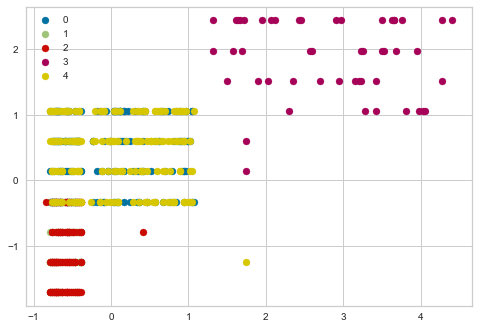

<IPython.core.display.Javascript object>

In [43]:
# Getting unique labels

u_labels = np.unique(label)

# plotting the results:

for i in u_labels:
    plt.scatter(
        subset_scaled_df.iloc[label == i, 0],
        subset_scaled_df.iloc[label == i, 1],
        label=i,
    )
plt.legend()
plt.show()

### Observations

We can see a clear overlap of clusters 4 and 0. Also the clusters 3 and 1 are overlaping.

#### Let's try 3 clusters to check if can get clear seperated clusters

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [45]:
# adding kmeans cluster labels to the original dataframe
subset_scaled_df["K_means_segments"] = kmeans.labels_

# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

label = kmeans.fit_predict(subset_scaled_df)
print(label)

[0 1 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<IPython.core.display.Javascript object>

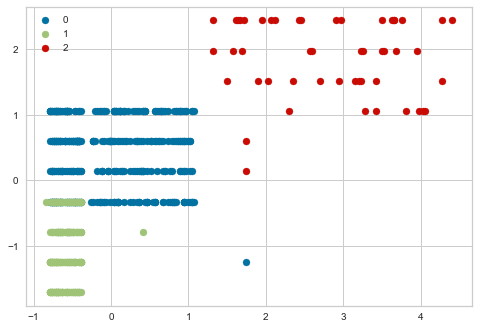

<IPython.core.display.Javascript object>

In [46]:
# Getting unique labels

u_labels = np.unique(label)

# plotting the results:

for i in u_labels:
    plt.scatter(
        subset_scaled_df.iloc[label == i, 0],
        subset_scaled_df.iloc[label == i, 1],
        label=i,
    )
plt.legend()
plt.show()

### Observations

All the 3 clusters are seperate without any overlapping. 3 clusters seem to be optimum in this case as we can see 3 groups of customers with distinct features

### Creating cluster profile for 3 clusters and checking the number of observations in each cluster

In [47]:
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [48]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [49]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,23789.137380,4.252396,3.086262,2.038339,4.476038,313
2,28016.835017,4.505051,1.986532,1.808081,3.063973,297


<IPython.core.display.Javascript object>

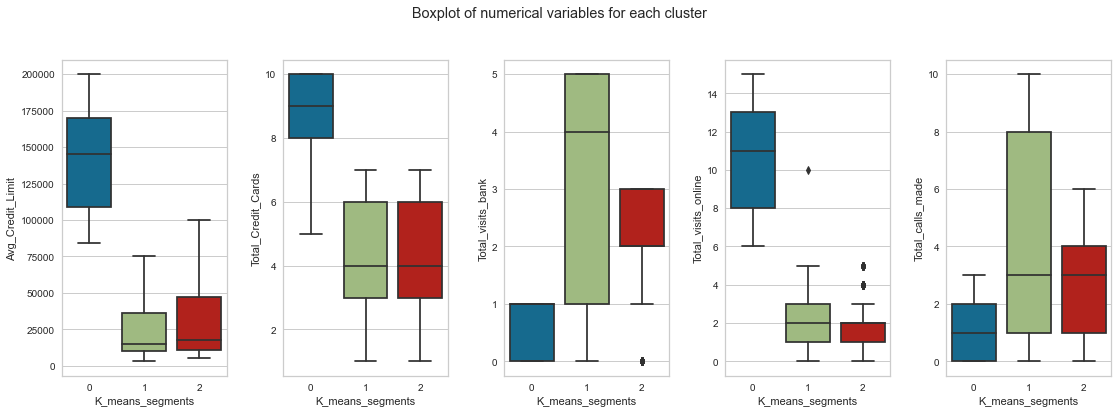

<IPython.core.display.Javascript object>

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

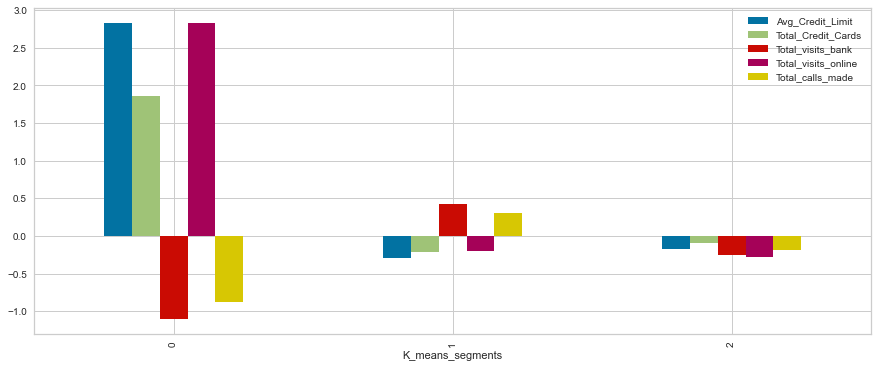

<IPython.core.display.Javascript object>

In [51]:
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Insights

### Cluster 0

1. Customers from this group do not use online services much for any transaction or communication but prefer to visit the bank. 
2. The calls made to the bank is also very less. They visit the bank for their services
3. They hold moderate number of cards and have a low credit limit
4. 387 customers belong to this group

### Cluster 1

Customers from this group

1. Have a very low credit limit and they hold just 2 to 3 credit cards (mean for the group).
2. Are using the online services offered by the bank at a small scale and have also contacted the bank the maximum. These calls can be related to online banking.
3. have not visited the bank. Their contact with bank is mainly by calls or through online services.
4. This is the second largest group comprising of 223 customers

### Cluster 3

1. This is the smallest cluster comprising of only 50 customers
2. These customers have very high credit limit mainly because of the huge number of credit cards they hold. The members from this group hold 8 to 10 cards on a average.
3. Members from this group have shown a very high amount of online activity. For most of their transaction they use online services.
4. They haardly visit the bank or call the bank for anything.
5. These can be accounts related to big companies who have big deposits and different cards for different purposes.

### Business Recommendation

1. To increase the credit card customer base the bank should target Cluster 0 to sell new schemes. This group of customers have a good credit limit. If the bank can make them participate in more deposit schemes or fund investments, it will increase their online presence and they will use more online services by the bank

2. Cluster 0 can be for customers who have joined the bank recently as their interaction with the bank is quite less observing the calls made, visits made or online usage of bank services. These customers should be engaged more with more interesting money saving schemes by the bank or credit cards which give them more value for money when used. These are potential customers as they have good credit limit and hold considerable number of cards but their interaction with bank is poor

3. Cluster 1 is also an equally important group as this group is already active online and also interacting with the bank by calls. This group should be engaged more to increase their bank deposits thus incresing their very low credit limits. They should also be introduced to different credit cards which will give them monetory benefit. They should be targetted for online investments and other deposit schemes as this group is already active online.

4. This group might be for big companies or customers with high salary who have 8 to 10 credit cards and who are very active on bank's online services. Though they hardly make any calls or visit the bank. More regular call should be made to these customers. Special online services for instant chat or query resolver should be designed. they should be offered schemes on their existing cards which will encourage them to use these cards more. 

5. The online interaction by the bank should be improved and a 24 hrs intelligent messenger service should be in place to help the customers in resolving any queries.


# Applying Hierarchical Clustering

### Data preparation

In [52]:
# Creating a dataframe from the scaled data
HC_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [53]:
data_HC = df.copy()
data_HC.drop("Sl_No", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [54]:
data_HC.drop("Customer Key", inplace=True, axis=1)

<IPython.core.display.Javascript object>

### Checking cophenetic correlation score for different distances

In [55]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(HC_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(HC_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm



Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553604.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

In [56]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Dendrograms for different linkage methods
### Method : Euclidean

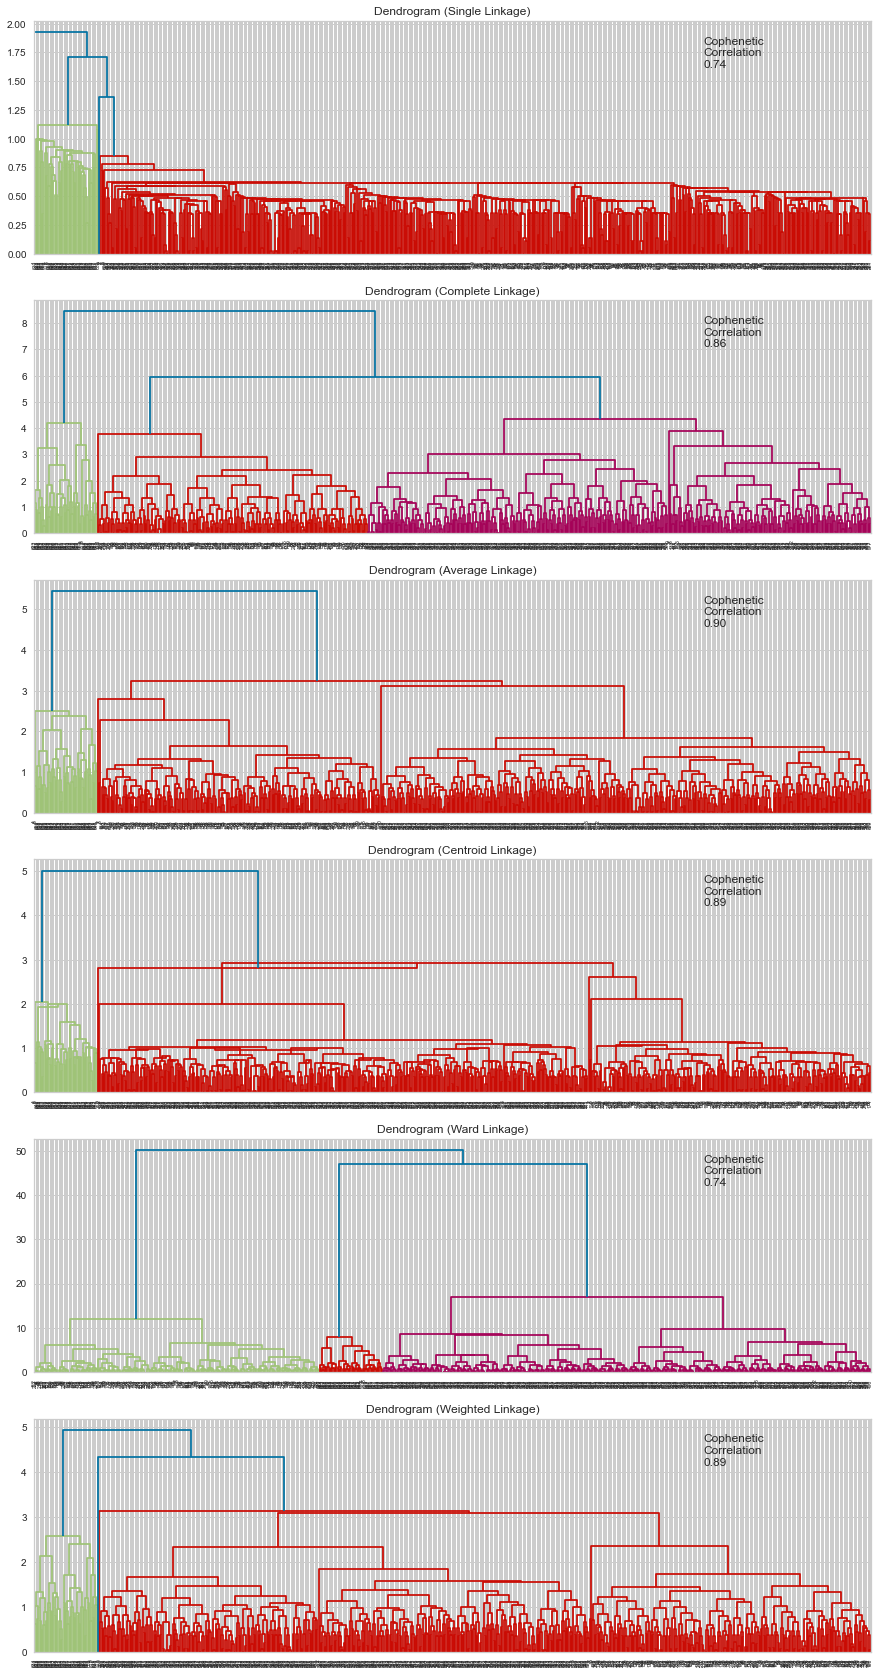

<IPython.core.display.Javascript object>

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [58]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


<IPython.core.display.Javascript object>

### Observation

The highest cophenetic correlation score is for average linkage but we can see 3 clear clusters in complete linkage and 5 in ward linkage.

#### Checking dendograms for other metrics as well

### Dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods

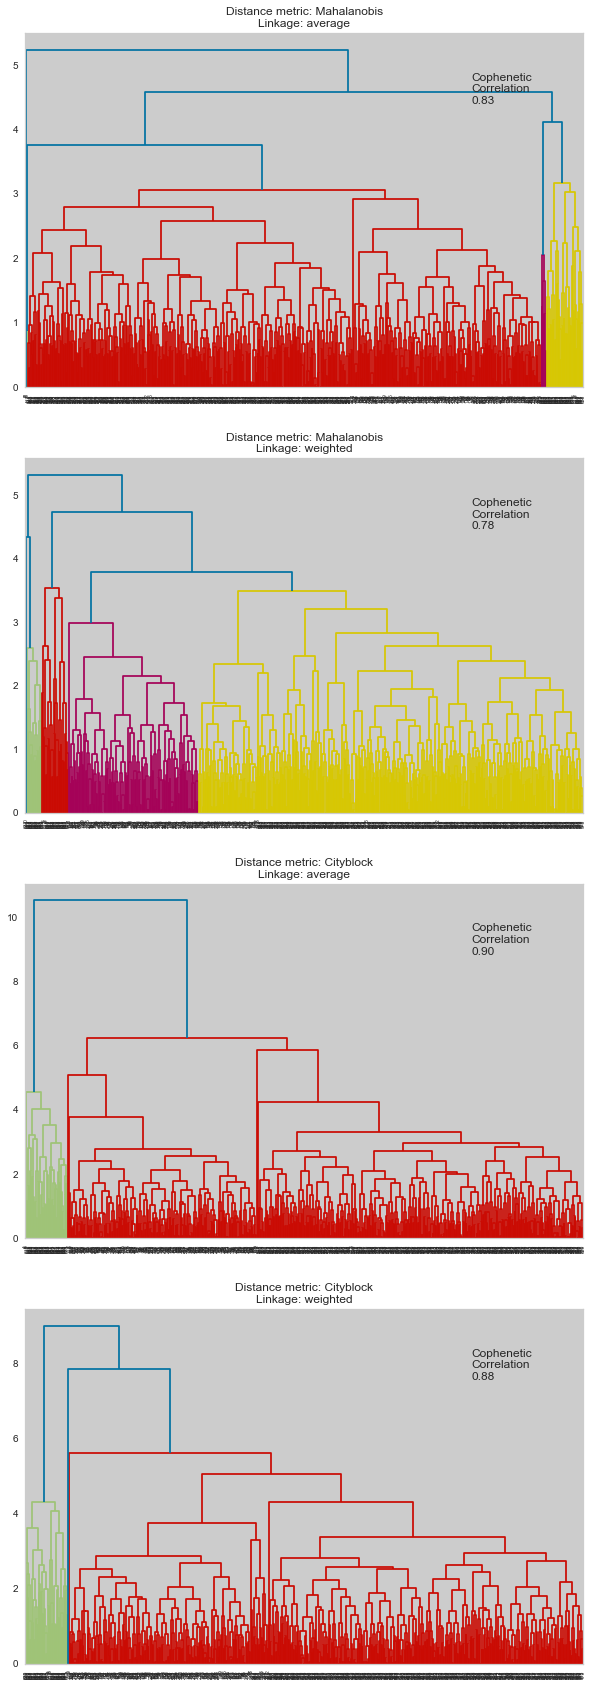

<IPython.core.display.Javascript object>

In [59]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(HC_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(HC_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

### Observation

Cityblock metric with average linkage gives 3 distinct clusters

## Checking Euclidean metric with complete and ward linkage and Cityblock metric with average linkage for further analysis


### If we cut Complete linkage at a height of 5 with euclidean metric, we get 4 distinct clusters

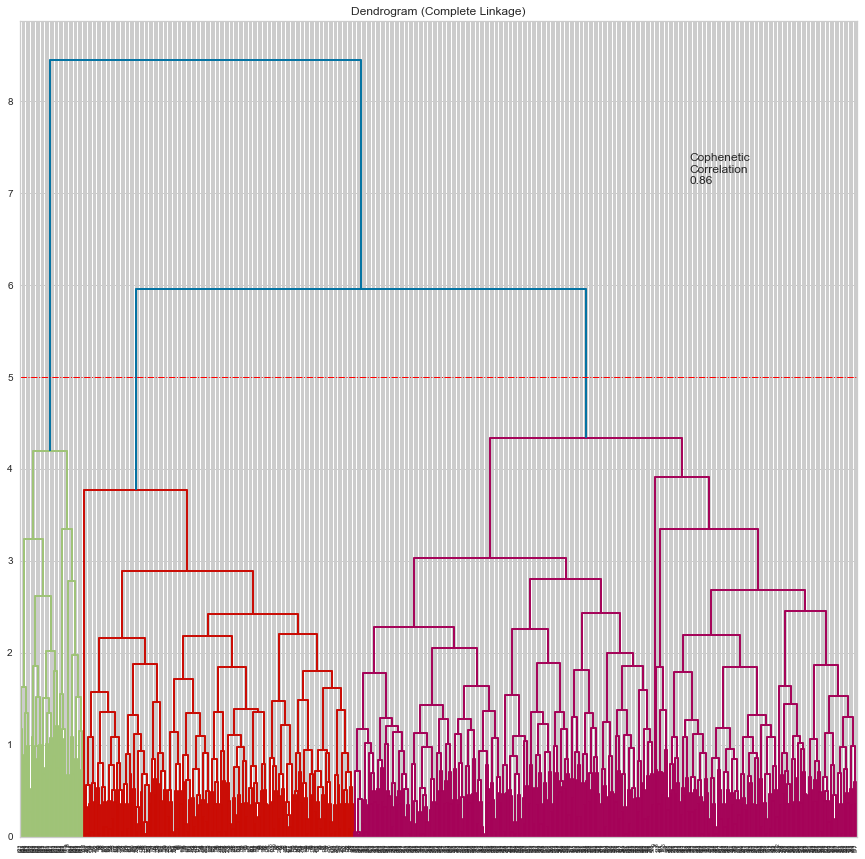

<IPython.core.display.Javascript object>

In [60]:
# list of linkage methods
linkage_methods = ["complete"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=5)
plt.axhline(y=5, c="red", lw=1, linestyle="dashdot")

In [61]:
HCmodel = AgglomerativeClustering(
    n_clusters=4, affinity="euclidean", linkage="complete"
)
HCmodel.fit(HC_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=4)

<IPython.core.display.Javascript object>

In [62]:
# adding hierarchical cluster labels to the original and scaled dataframes

HC_scaled_df["HC_Clusters"] = HCmodel.labels_
data_HC["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [63]:
cluster_profile = data_HC.groupby("HC_Clusters").mean()


<IPython.core.display.Javascript object>

In [64]:
cluster_profile["count_in_each_segments"] = (
    data_HC.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [65]:
# Cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,29331.250000,5.350000,2.318750,1.006250,2.550000,160
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213
3,35729.957806,5.535865,4.139241,1.012658,1.729958,237


<IPython.core.display.Javascript object>

### Boxplot of scaled numerical values

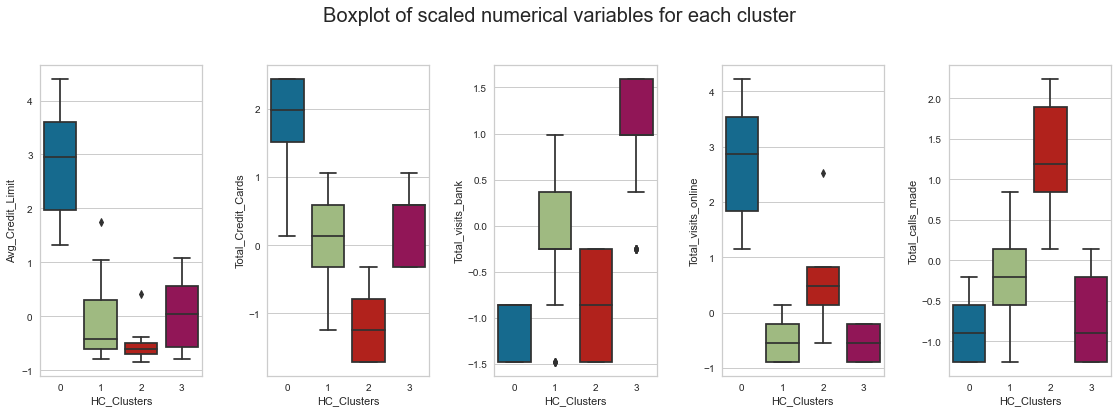

<IPython.core.display.Javascript object>

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=HC_scaled_df[num_col[counter]], x=HC_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

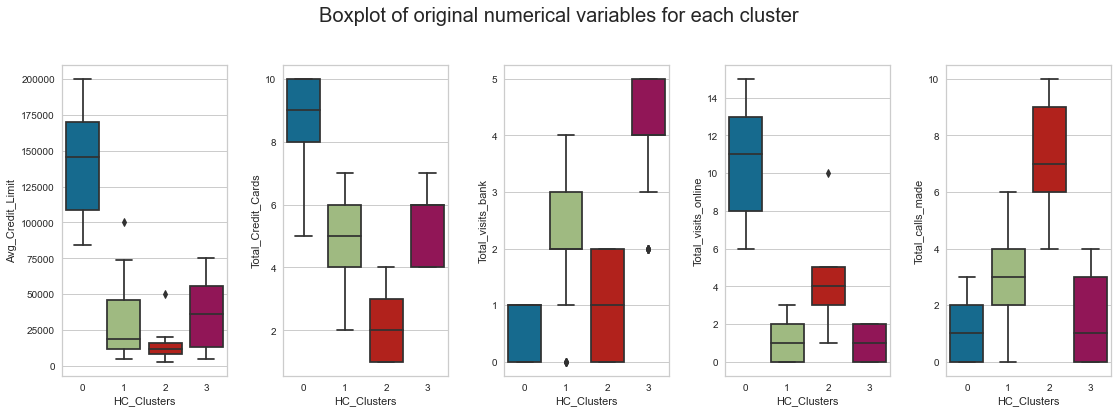

<IPython.core.display.Javascript object>

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data_HC[num_col[counter]], x=data_HC["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## If we cut Ward linkage at a height of 11 with euclidean metric, we get 6 distinct clusters

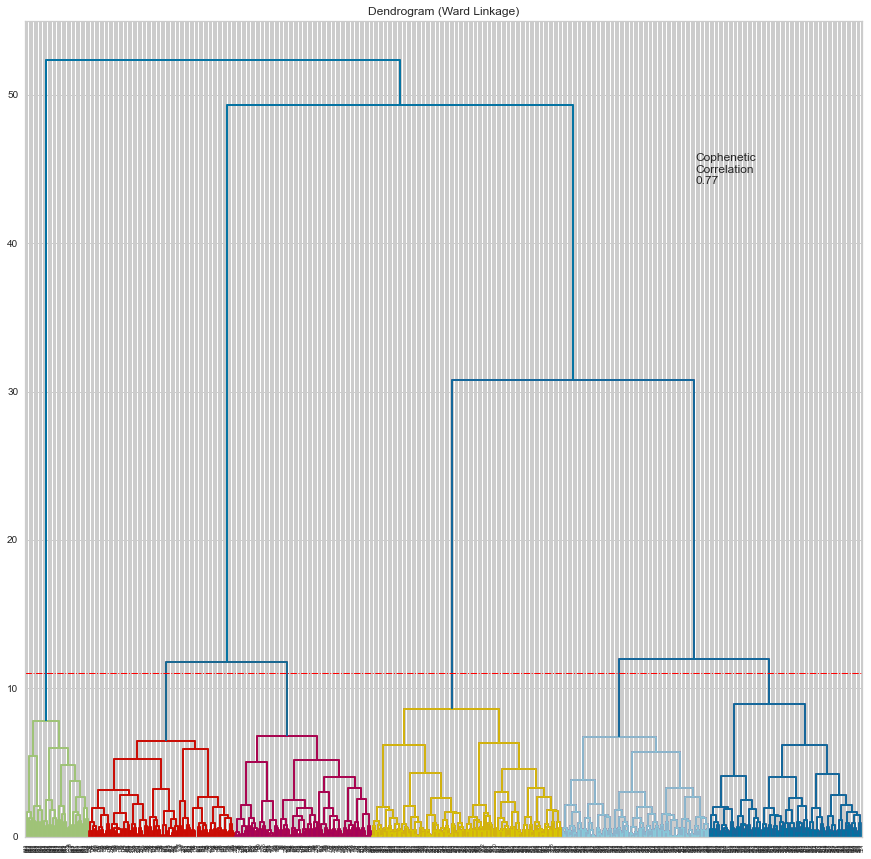

<IPython.core.display.Javascript object>

In [68]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=11)
plt.axhline(y=11, c="red", lw=1, linestyle="dashdot")

In [69]:
HCmodel_ward = AgglomerativeClustering(
    n_clusters=6, affinity="euclidean", linkage="ward"
)
HCmodel_ward.fit(HC_scaled_df)

AgglomerativeClustering(n_clusters=6)

<IPython.core.display.Javascript object>

In [70]:
HC_scaled_df["HC_Clusters_ward"] = HCmodel_ward.labels_
data_HC["HC_Clusters_ward"] = HCmodel_ward.labels_

<IPython.core.display.Javascript object>

### Cluster profiling for ward

In [71]:
cluster_profile_ward = data_HC.groupby("HC_Clusters_ward").mean()

<IPython.core.display.Javascript object>

In [72]:
cluster_profile_ward["count_in_each_segments"] = (
    data_HC.groupby("HC_Clusters_ward")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [73]:
# Cluster profiles
cluster_profile_ward.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segments
HC_Clusters_ward,,,,,,,
0,53818.181818,5.768595,3.785124,0.950413,1.694215,3.000000,121
1,30526.666667,5.473333,2.453333,0.940000,2.440000,1.000000,150
2,12518.518519,2.342593,0.750000,3.731481,8.481481,2.000000,108
3,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,50
4,16862.068966,5.293103,4.508621,1.077586,1.767241,3.000000,116
5,11895.652174,2.460870,1.095652,3.400000,5.382609,1.913043,115


<IPython.core.display.Javascript object>

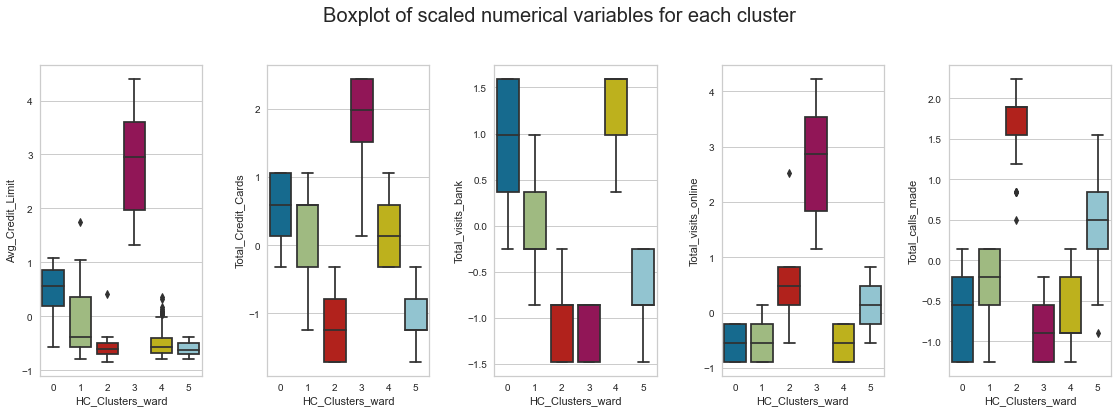

<IPython.core.display.Javascript object>

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=HC_scaled_df[num_col[counter]],
        x=HC_scaled_df["HC_Clusters_ward"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

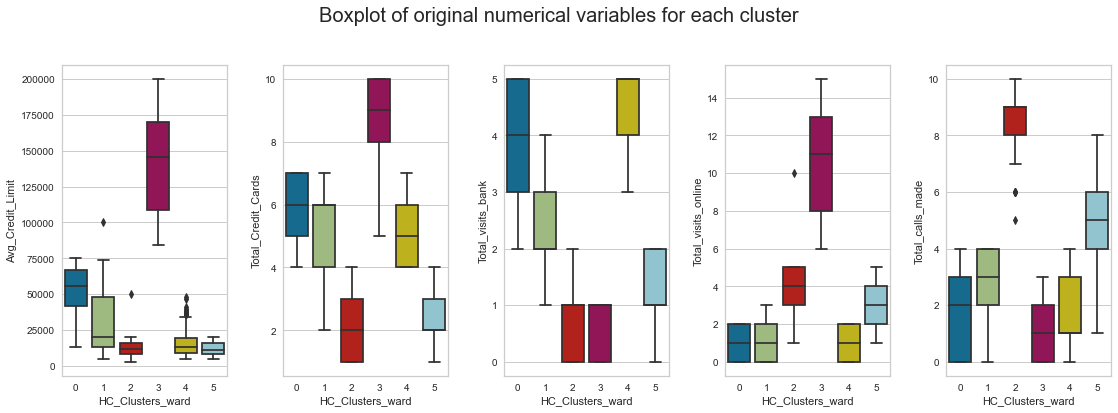

<IPython.core.display.Javascript object>

In [75]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data_HC[num_col[counter]], x=data_HC["HC_Clusters_ward"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights (Euclidean metric - ward linkage with 6 clusters)

### Cluster 0
1. Customers of this group have a moderate credit limit averaging upto 29470. 
2. They hold an average number of 5 credit cards
3. Customers from this cluster make the highest number of trips to the bank
4. They don't use the online services much
5. They also make very few calls to the bank. Average of hardly 2 calls a year
6. 194 customers form this cluster

### Clusters 3 and 5
Both these clusters are very similar in most of the features. The credit limit is the main distinctive feature for both groups
1. Customers from both these clusters hold an average of 5 to 6 credit cards,they make 2 to 3 visits to the bank a year, 2 to 4 calls to the bank a year and they don't use online services much though cluster 3 has a good credit limit

2. The credit limit for the cluster is upto 75000 with an average of 52000 which is quite high. Cluster 5 has a very low credit limit

191 customers together for this cluster

### Cluster 1

1. Customers from this cluster form a completely different group with very distinct features. They also form the smallest cluster with just 50 customers
2. This cluster has customers with the highest credit limit and highes number of credit card holders (upto 10)
3. They mostly use the online services
4. They hardly make any calls to bank or visit the bank.

### Clusters 2 and 4
Both these clusters are very similar in most of the features. The calls made to the bank is the main distinctive feature for both groups

1. Customers from this group have low credit limit (avg upto 12000), they hold an average of 2 to 3 credit cards, they hardly visit the bank (avg once a year) but these customers use the online services to a greater extend compared to clusters 0, 3 and 5.
2. Customers from these 2 groups have also made the highest number of calls to the bank with cluster 2 with an average of 8 calls and cluster 4 with an average of 5 calls a year.

This cluster contains 180+ customers when taken together





## If we cut Manhattan metric with average linkage at a distance of 7 we get 4 distinct clusters

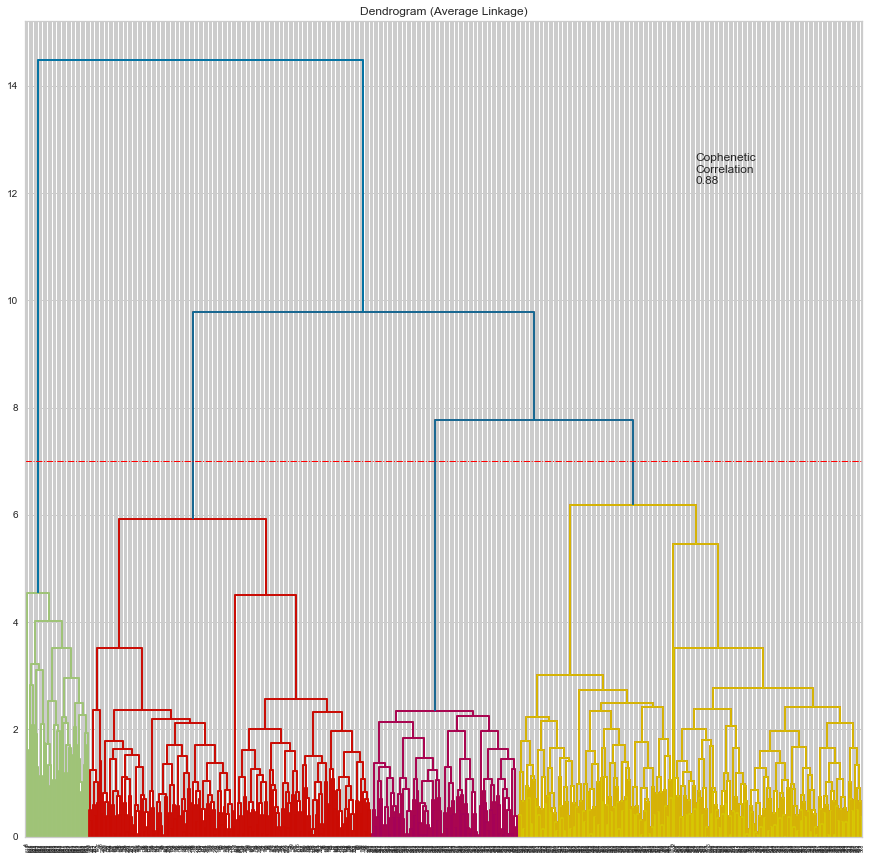

<IPython.core.display.Javascript object>

In [76]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(HC_scaled_df, metric="cityblock", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(HC_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7)
plt.axhline(y=7, c="red", lw=1, linestyle="dashdot")

In [77]:
HCmodel_city = AgglomerativeClustering(
    n_clusters=4, affinity="cityblock", linkage="average"
)
HCmodel_city.fit(HC_scaled_df)

AgglomerativeClustering(affinity='cityblock', linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [78]:
HC_scaled_df["HC_Clusters_city"] = HCmodel_city.labels_
data_HC["HC_Clusters_city"] = HCmodel_city.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling for Cityblock average linkage

In [79]:
cluster_profile_city = data_HC.groupby("HC_Clusters_city").mean()

<IPython.core.display.Javascript object>

In [80]:
cluster_profile_city["count_in_each_segments"] = (
    data_HC.groupby("HC_Clusters_city")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [81]:
# Cluster profiles
cluster_profile_city.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,HC_Clusters_ward,count_in_each_segments
HC_Clusters_city,,,,,,,,
0,40926.199262,5.605166,3.047970,0.944649,2.107011,1.892989,0.553506,271
1,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,3.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.955157,3.547085,223
3,16862.068966,5.293103,4.508621,1.077586,1.767241,3.000000,4.000000,116


<IPython.core.display.Javascript object>

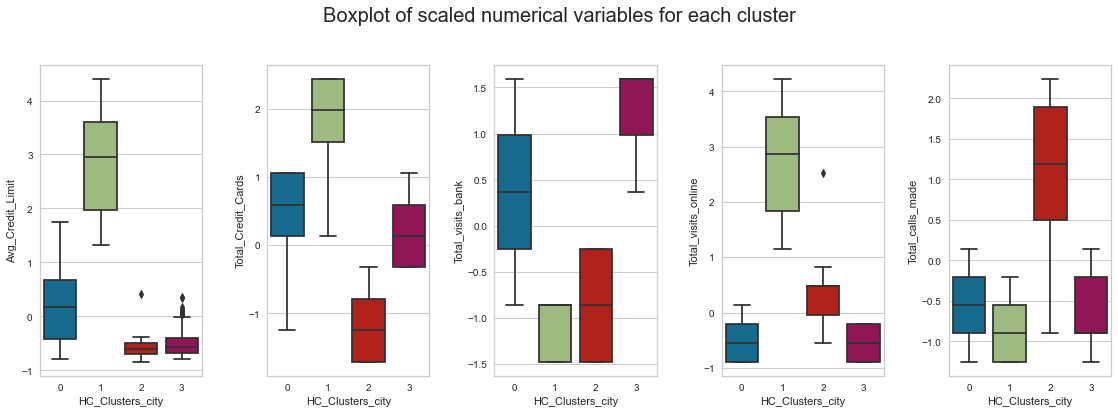

<IPython.core.display.Javascript object>

In [82]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=HC_scaled_df[num_col[counter]],
        x=HC_scaled_df["HC_Clusters_city"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

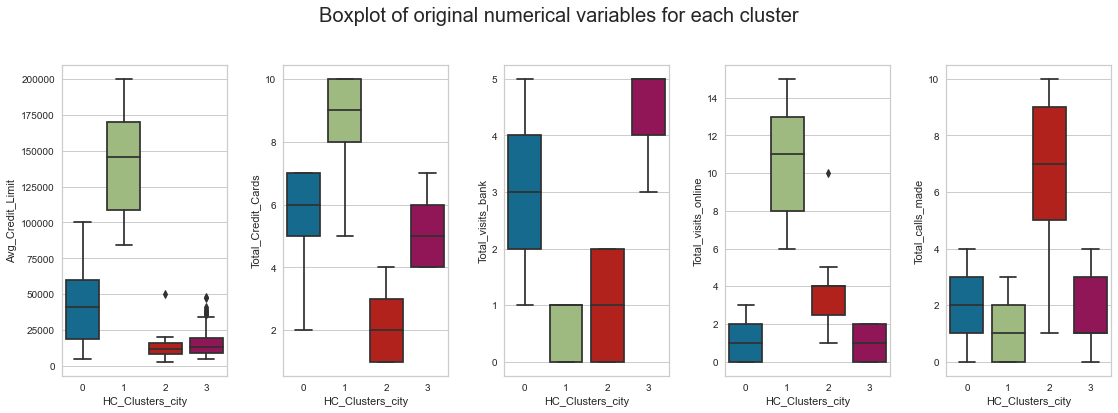

<IPython.core.display.Javascript object>

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data_HC[num_col[counter]], x=data_HC["HC_Clusters_city"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights for Euclidean -complete linkage -4 clusters and Cityblock-Average linkage- 4 clusters

### Both these have same distribution in the clusters 

#### Cluster 0
1. Has average credit limit of 27000
2. they hold 4 to 5 credit cards on an average
3. They approximately make 2 visits to bank and 2 online visit a year
4. Total calls made by them is also around 3 to 4 a year


#### Cluster 1

This is the distinctive cluster of customers which we have seen in all the methods. They have the highest credit limit, hold upto 10 credit cards and most of their transaction is done online. They don't visit the bank or make calls to the bank on a regular basis

#### Cluster 2
1. Has average credit limit of 29000
2. they hold 5 to 6 credit cards on an average
3. They approximately make 4 to 5 visits to bank and 1 online visit a year
4. Total calls made by them is also around 1 to 2 a year


#### Cluster 3
1. Has lowest average credit limit of 12000 approx
2. they hold 2 to 3 credit cards on an average
3. They approximately make 1 visit to bank and 3 to 4 online visit a year
4. Total calls made by them is highest around 8 to 10 a year


## Comparison between 6 clusters and 4 clusters by Hierarchical Clustering

The 6 clusters formed had a lot of overlapping between them and the we could find 2 pairs of clusters with almost very similar features.

The 4 clusters by Euclidean complete linkage or Cityblock average linkage give a more distinct 4 clusters of customers for the bank 

## Plotting scatter plots and checking the cluster distribution for the above 3 clusters

#### Euclidean metric with ward linkage

In [84]:
label = HCmodel_ward.fit_predict(HC_scaled_df)
print(label)

[2 1 2 2 5 1 5 4 4 1 1 1 1 4 4 1 4 4 4 4 4 1 4 4 1 1 1 1 4 1 4 4 1 4 1 4 1
 4 1 1 1 4 4 4 4 1 4 4 1 4 1 4 1 1 1 4 4 1 1 1 4 1 4 1 1 4 1 4 1 1 1 4 4 4
 1 4 1 4 1 4 1 4 4 4 4 4 4 4 1 1 4 1 4 1 4 1 4 4 1 4 4 1 1 1 1 1 4 4 4 1 4
 1 1 4 1 4 1 1 4 1 4 1 4 1 4 4 1 1 4 4 4 4 4 1 4 4 1 1 1 1 1 4 4 4 1 4 1 4
 1 4 1 4 4 1 1 4 4 1 1 4 1 4 4 1 1 1 1 4 1 4 4 4 4 1 4 4 4 1 1 4 4 1 1 1 4
 4 4 4 4 4 1 4 4 1 4 1 1 4 1 1 1 1 1 1 4 4 4 4 1 1 4 4 4 1 1 1 4 4 4 1 1 4
 1 1 1 4 1 4 2 2 3 2 3 2 3 3 3 3 2 2 2 3 2 3 2 2 3 2 3 3 2 2 3 2 2 3 2 3 3
 3 3 2 3 2 3 3 3 3 3 3 3 2 2 3 3 2 3 3 3 3 3 2 2 2 2 3 3 2 2 3 2 2 2 2 3 3
 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 2 2 2 2 2 3 3 3 2 3 3 2 2 3 3 3 3 3 3 2 3 2
 3 3 3 3 2 2 2 2 2 3 2 2 3 2 2 3 2 2 2 2 3 3 3 3 3 2 2 2 2 3 2 3 0 0 2 2 3
 2 2 3 3 3 2 3 2 3 2 2 2 2 2 3 3 2 2 3 3 2 3 3 2 3 3 0 0 2 0 0 0 2 0 2 2 2
 0 0 2 2 0 3 3 2 0 2 0 0 0 2 0 0 2 3 2 2 0 0 3 0 0 2 0 2 0 0 0 2 0 2 2 2 0
 0 0 0 0 3 2 0 2 2 0 2 2 0 2 2 0 0 2 0 3 2 0 2 3 3 0 3 0 2 2 2 0 0 0 0 0 0
 2 2 3 3 0 2 0 0 0 0 0 0 

<IPython.core.display.Javascript object>

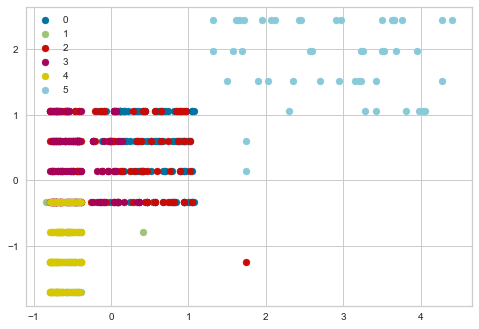

<IPython.core.display.Javascript object>

In [85]:
# Getting unique labels

u_labels = np.unique(label)

# plotting the results:

for i in u_labels:
    plt.scatter(
        HC_scaled_df.iloc[label == i, 0], HC_scaled_df.iloc[label == i, 1], label=i,
    )
plt.legend()
plt.show()

### Observation

We can see attribute overlapping between clusters 0,2,3,4 and 5

### Euclidean metric with complete linkage and Manhattan metric with average linkage
(Both have same number of clusters and hece same distribution)

In [86]:
label2 = HCmodel.fit_predict(HC_scaled_df)
print(label2)

[2 3 2 2 1 3 1 0 0 3 3 3 3 0 0 3 0 0 0 0 0 3 0 0 3 3 3 3 0 3 0 0 3 0 3 0 3
 0 3 3 3 0 0 0 0 3 0 0 3 0 3 0 3 3 3 0 0 3 3 3 0 3 0 3 3 0 3 0 3 3 3 0 0 0
 3 0 3 0 3 0 3 0 0 0 0 0 0 0 3 3 0 3 0 3 0 3 0 0 3 0 0 3 3 3 3 3 0 0 0 3 0
 3 3 0 3 0 3 3 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 3 3 3 3 3 0 0 0 3 0 3 0
 3 0 3 0 0 3 3 0 0 3 3 0 3 0 0 3 3 3 3 0 3 0 0 0 0 3 0 0 0 3 3 0 0 3 3 3 0
 0 0 0 0 0 3 0 0 3 0 3 3 0 3 3 3 3 3 3 0 0 0 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0
 3 3 3 0 3 0 2 2 0 2 0 2 0 0 0 0 2 2 2 0 2 0 2 2 0 2 0 0 2 2 0 2 2 0 2 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 2 2 0 2 2 2 2 0 0
 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 2 2 0
 2 2 0 0 0 2 0 2 0 2 2 2 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 

<IPython.core.display.Javascript object>

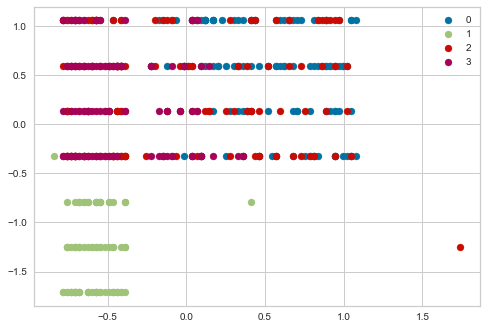

<IPython.core.display.Javascript object>

In [87]:
# Getting unique labels

u_labels = np.unique(label2)

# plotting the results:

for i in u_labels:
    plt.scatter(
        HC_scaled_df.iloc[label == i, 0], HC_scaled_df.iloc[label == i, 1], label=i,
    )
plt.legend()
plt.show()

### Observation

We can see overlapping of attribute values between 0 and 3 and slight overlapping between 2 and 3

## Business recommendation based on 4 clusters

1. The customers of cluster 2 have a good credit limit and they hold a good number of credit cards. They prefer to visit the bank for any puerpose. Bank should ake effort to introduce their online services to them as they are not using these services much.. this will make their work easier.

2. Customers from cluster 0 also have a good credit limit and they also hold an average of 4 to5 credit cards. They are also using the online services more than Cluster 2. Bank should involve them more in online services as they are already using it but at a lower scale. Bank should also introduce new schemes to both these groups (2 and 0) as they are interacting with the bank on a more regular basis physically or by calls/online. Cluster 2 and 0 frorm the major chunk of customers, nearly 520 together and hence bank should focus on them more.

3. Cluster 3 can be new customers who have a very low credit limit. They have a high call rate to the bank. Since they are not much active otherwise online or visiting the bank, they should be involved in new deposit schemes / credit card schemes which could help in increasing their credit limit and hence they will also start using online services to matain and monitor these schemes.

4. Cluster 1 are online active customers and are using Bank's online services more than any other group. Bank should improve their chat/online bot assistant services so that these customers who are the highest spenders get instant reply to their queries and are engaged. Bank should also come up with new schemes on the existing credit cards for these customers so these cards are used by them more for various purposes. Bank should also give special premium class to these customers with special privileges which they can use online thus encouraging them to use these cards and bank's services to spend more thus bringing in more income.

## Comparison of K-means clusters and Hierarchical clustering

#### K-means

K-means gave us 3 very distinct clusters. 
There was no overlapping between the clusters. 
Each cluster had distinct features which can group the customers in 3 different groups
Apart from the group which has Highest credit limit and maximum credit cards the other 2 groups were fairly large.

#### Hierarchical Clustering

Hierarchical clustering gave us 6 and 4 clusters. These helped us to further divide the groups made by K-means and get a more deeper understanding on how customer interation with the bank differs even if they have almost same credit limit and same number of credit cards.
Hierarchical clustering has helped more to get a better understanding of customer's interaction with the bank and also understanding the number of credit cards held and their credit limits 